#Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Projects/Analisis Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Projects/Analisis Titanic/test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Exploratory Data Analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.2f}%\n({v:d})'.format(pct, v=val)
    return my_format

In [ ]:
def add_labels(ax):
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'baseline', fontsize=12, color='black', xytext = (0, 1),
                        textcoords = 'offset points')

#Data Preprocessing

**Fill in null data**

In [ ]:
mean = df_train['Age'].mean()
df_train['Age'].fillna(mean, inplace=True)
df_train.isnull().sum()
mean = df_test['Age'].mean()
df_test['Age'].fillna(mean, inplace=True)
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**Drop Row and Column**

In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)
df_train.dropna(subset=['Embarked'], inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test.dropna(subset=['Fare'], inplace=True)

**Create Age Group**

In [ ]:
range = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train['Age'], range, labels=labels, right=False)
df_test['AgeGroup'] = pd.cut(df_test['Age'], range, labels=labels, right=False)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Young Adult


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,Young Adult
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,Adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,Adult
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,Young Adult


##Distribution of Data

###Survival Distribution

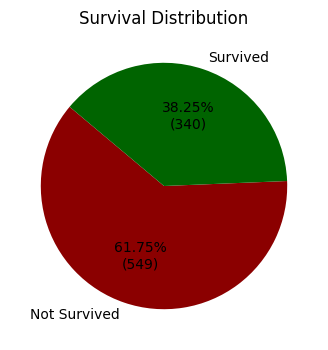

In [ ]:
survived_counts = df_train['Survived'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct=autopct_format(survived_counts), startangle=140, colors=['darkred', 'darkgreen'])
plt.title('Survival Distribution')
plt.show()

###Passengers Class Distribution

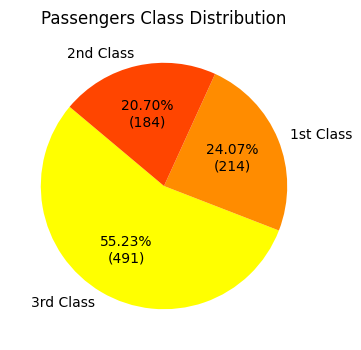

In [ ]:
pclass_counts = df_train['Pclass'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(pclass_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct=autopct_format(survived_counts), startangle=140, colors=['yellow', 'darkorange','orangered'])
plt.title('Passengers Class Distribution')
plt.show()

###Gender Distribution

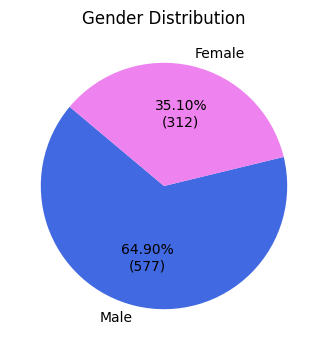

In [ ]:
sex_counts = df_train['Sex'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct=autopct_format(survived_counts), startangle=140, colors=['royalblue', 'violet'])
plt.title('Gender Distribution')
plt.show()

###Age Distribution

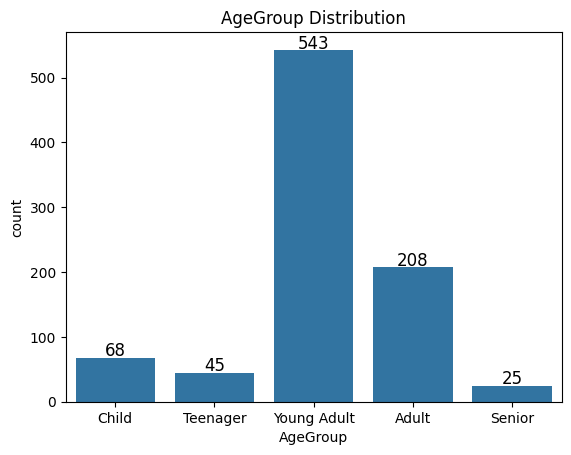

In [ ]:
ax = sns.countplot(x='AgeGroup', data=df_train)
plt.title('AgeGroup Distribution')
add_labels(ax)
plt.show()

###Distribution of Port of Embarkation

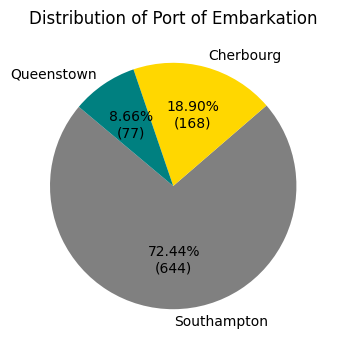

In [ ]:
embarked_counts = df_train['Embarked'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(embarked_counts , labels=['Southampton', 'Cherbourg', 'Queenstown'], autopct=autopct_format(survived_counts), startangle=140, colors=['gray', 'gold','teal'])
plt.title('Distribution of Port of Embarkation')
plt.show()

##Age Distribution by Survival

Text(0.5, 1.0, 'Age Distribution by Survival')

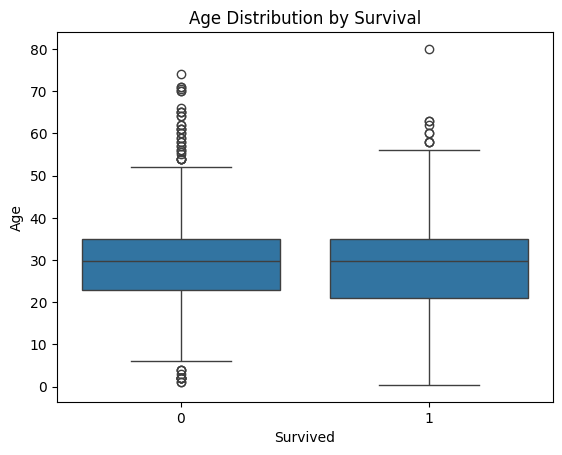

In [ ]:
ax = sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survival')

##Survival by Sex

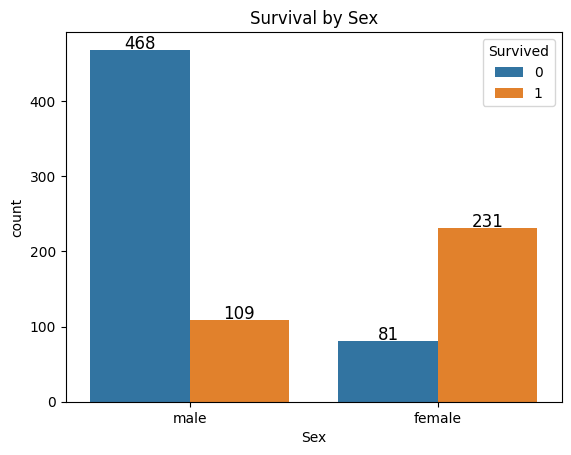

In [ ]:
ax = sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Survival by Sex')
add_labels(ax)
plt.show()

##Survival by Passenger Class

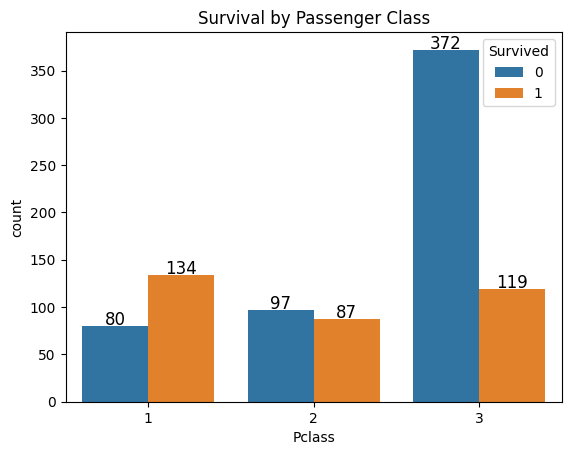

In [ ]:
ax = sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival by Passenger Class')
add_labels(ax)
plt.show()


##Survival by Port of Embarkation

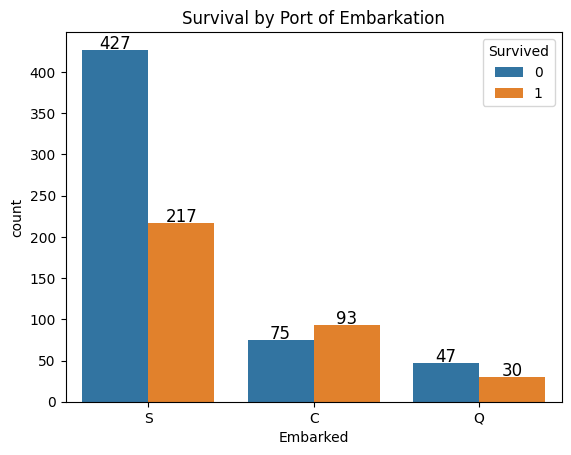

In [ ]:
ax = sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.title('Survival by Port of Embarkation')
add_labels(ax)
plt.show()


#Data Modelling

**Rearange and dropping unused column**

In [ ]:
train = ['Survived', 'Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'Embarked']
test = ['Pclass', 'Sex', 'AgeGroup', 'SibSp', 'Parch', 'Embarked']
df_train = df_train[train]
df_test = df_test[test]

In [ ]:
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['AgeGroup'] = label_encoder.fit_transform(df_train['AgeGroup'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['AgeGroup'] = label_encoder.fit_transform(df_test['AgeGroup'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])

<ipython-input-30-7252dcef3eb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
<ipython-input-30-7252dcef3eb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AgeGroup'] = label_encoder.fit_transform(df_train['AgeGroup'])
<ipython-input-30-7252dcef3eb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train = X.values
y_train = y.values

In [ ]:
X_test = df_test.values

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6317 - loss: 0.6722 - val_accuracy: 0.7753 - val_loss: 0.6075
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7667 - loss: 0.6080 - val_accuracy: 0.8090 - val_loss: 0.5420
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.5545 - val_accuracy: 0.8090 - val_loss: 0.4903
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.5175 - val_accuracy: 0.7865 - val_loss: 0.4558
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.4741 - val_accuracy: 0.7865 - val_loss: 0.4372
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4744 - val_accuracy: 0.7865 - val_loss: 0.4282
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4520 - val_accuracy: 0.7865 - val_loss: 0.4221
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4594 - val_accuracy: 0.7865 - val_loss

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,309 (9.02 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,540 (6.02 KB)

#Model Evaluation

In [ ]:
accr = model.evaluate(X_train,y_train)
print('Test set\n  Loss: {:.2f}\n  Accuracy: {:.2f}%'.format(accr[0], accr[1] * 100))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8319 - loss: 0.4189
Test set
  Loss: 0.40
  Accuracy: 82.79%


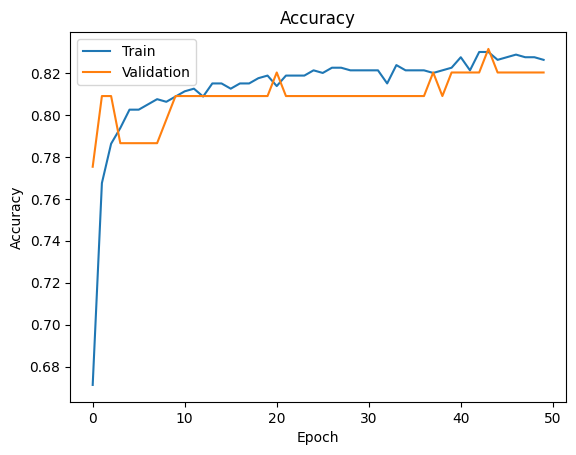

In [ ]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

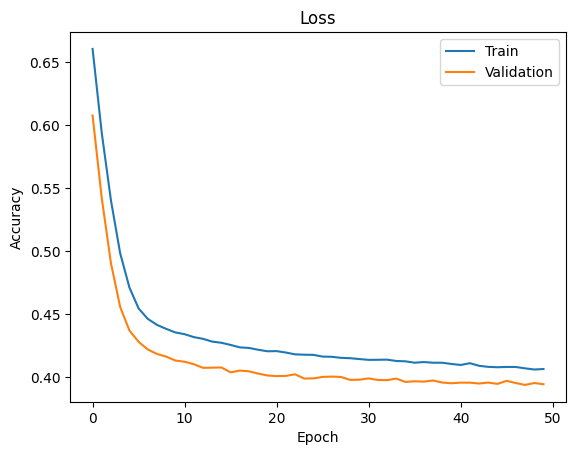

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


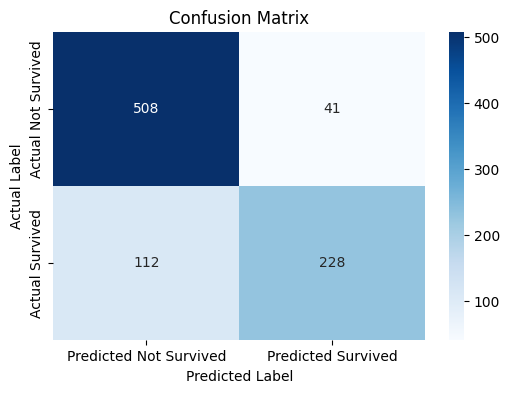

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_train) > 0.5).astype("int32")
cm = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


#Model Prediction Results

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
df = pd.read_csv('/content/drive/MyDrive/Projects/Analisis Titanic/test.csv')
df = df.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
df['Survived'] = y_pred
df.to_csv('titanic.csv',index=False)

14/14 [==============================] - 0s 2ms/step
